## Investigating the optimal racing line trajectory

## Introduction

In this project, I explore how different car features affect the optimal racing line through a corner using a physics based simulation.

## Methods

For each line, the maximum speed based on the car's grip and the radius of the line and estimated the time to traverse the corner is calculated. The results are visualised to compare different strategies and car features.

#### Additional Information

- The **2004 Mazda RX-8** is used for the simulation ([source](https://fastestlaps.com/models/mazda-rx-8)).
- **mass**: Curb weight plus estimated weight of one driver.
- **max_lateral_g**: Maximum lateral acceleration, also known as "skidpad" or "cornering grip."
- **max_accel**: Maximum acceleration (from data).
- **max_brake**: Calculated from 100–0 km/h stopping distance using the formula:

$$
a = \frac{v^2}{2s}
$$

where:  
- $a$ = deceleration
- $v$ = initial speed
- $s$ = stopping distance

Car parameters: {'mass': 1440, 'max_lateral_g': 0.92, 'max_accel': 4.0, 'max_brake': 6.0}


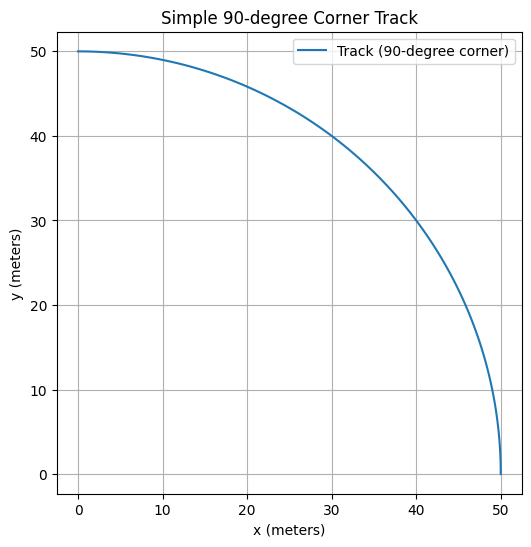

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# simulation setup
car = {
    'mass': 1380+60, # (kg)     
    'max_lateral_g': 0.92, # (g)
    'max_accel': 4.0, # (m/s^2)
    'max_brake': 6.0 # (m/s^2)
}
print("Car parameters:", car)

# track parameters
radius = 50  # radius of the corner
num_points = 100  # amunt of nodes to define the curve

# corner from 0 to pi/2 radians
theta = np.linspace(0, np.pi/2, num_points)
x = radius * np.cos(theta)
y = radius * np.sin(theta)

# plot the track
plt.figure(figsize=(6,6))
plt.plot(x, y, label='Track (90-degree corner)')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('Simple 90-degree Corner Track')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

### Simulating Different Racing Lines

To explore how the path through the corner affects performance, several possible racing lines are drawn.  
Each line is represented by a different radius, ranging from inside to outside lines.

For each line:
- Calculate the maximum speed the car can maintain, based on the physics of cornering (centripetal force and tire grip).
- Compute the length of the arc for that radius.
- Estimate the time it would take to travel the arc at the maximum speed.

Radius: 40.0 m | Max speed: 19.00 m/s | Time: 3.31 s
Radius: 45.0 m | Max speed: 20.15 m/s | Time: 3.51 s
Radius: 50.0 m | Max speed: 21.24 m/s | Time: 3.70 s
Radius: 55.0 m | Max speed: 22.28 m/s | Time: 3.88 s
Radius: 60.0 m | Max speed: 23.27 m/s | Time: 4.05 s


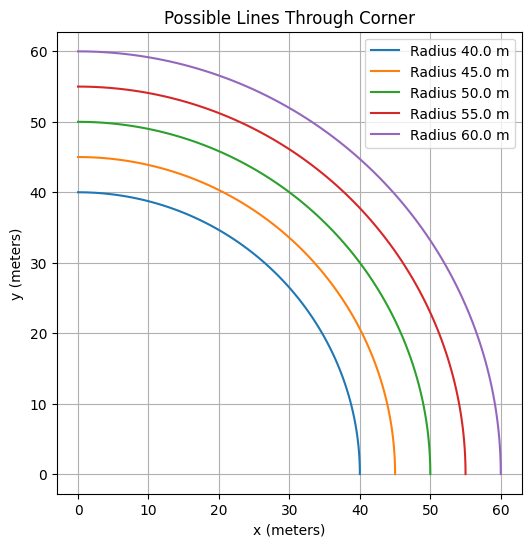

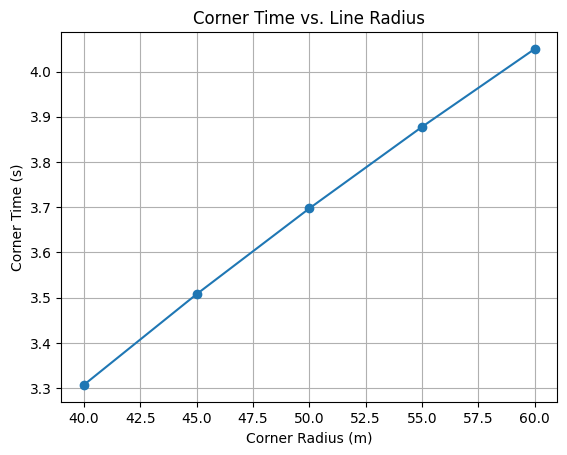

In [2]:
# simulate diff possible racing lines through the corner

# from tight (inner) to wide (outer)
radii = np.linspace(radius - 10, radius + 10, 5)  # 5 lines, 10m inside/outside

# car grip: max lateral acceleration defined by (a = v^2 / r)  "Essentially, the faster the vehicle goes and the tighter the curve (smaller radius), the greater the lateral acceleration."
g = 9.81  # grav
max_lateral_a = car['max_lateral_g'] * g

lap_times = []
for r in radii:
    # const radius corner, max speed = sqrt(a * r)
    max_speed = np.sqrt(max_lateral_a * r)
    # Arc length = angle * radius (for 90 degrees = pi/2 radians)
    arc_length = (np.pi / 2) * r
    # Time = distance / speed
    time = arc_length / max_speed
    lap_times.append(time)
    print(f"Radius: {r:.1f} m | Max speed: {max_speed:.2f} m/s | Time: {time:.2f} s")

# Plot the different lines on the track
plt.figure(figsize=(6,6))
for r in radii:
    x_line = r * np.cos(theta)
    y_line = r * np.sin(theta)
    plt.plot(x_line, y_line, label=f'Radius {r:.1f} m')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('Possible Lines Through Corner')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

# Plot lap time vs. radius
plt.figure()
plt.plot(radii, lap_times, marker='o')
plt.xlabel('Corner Radius (m)')
plt.ylabel('Corner Time (s)')
plt.title('Corner Time vs. Line Radius')
plt.grid(True)
plt.show()

## Results (Expanded with Physics)

As the radius of the racing line increases, the car can maintain a higher speed through the corner due to reduced lateral acceleration demands. However, this comes at the cost of a longer path. The optimal racing line is not simply the shortest or the fastest in terms of speed, but rather the one that achieves the best balance between these two factors to minimize overall cornering time. This relationship is proved by the following equations:

- **Centripetal Force and Maximum Cornering Speed:**

  The maximum speed a car can maintain through a corner without sliding is determined by the available lateral grip (tire friction) and the radius of the turn:
  $$
  F_{\text{lat}} = m \frac{v^2}{r}
  $$
  where:
  - $F_{\text{lat}}$ = lateral (centripetal) force
  - $m$ = mass of the car
  - $v$ = speed
  - $r$ = radius of the corner

  The maximum lateral force is set by the tire grip:
  $$
  F_{\text{lat, max}} = m \cdot a_{\text{lat, max}}
  $$
  where $a_{\text{lat, max}}$ is the maximum lateral acceleration (in m/s²).

  Setting these equal gives the maximum speed for a given radius:
  $$
  v_{\text{max}} = \sqrt{a_{\text{lat, max}} \cdot r}
  $$

- **Arc Length of the Corner:**

  For a 90-degree corner ($\frac{\pi}{2}$ radians), the distance traveled along the arc is:
  $$
  s = \theta \cdot r = \frac{\pi}{2} \cdot r
  $$

- **Cornering Time:**

  The time to traverse the corner at constant speed is:
  $$
  t = \frac{s}{v_{\text{max}}} = \frac{\frac{\pi}{2} \cdot r}{\sqrt{a_{\text{lat, max}} \cdot r}}
  $$

### Simulation Insights

- **Speed vs. Distance Trade-off:**  
  A smaller radius shortens the path but reduces the maximum speed due to higher required lateral acceleration. A larger radius allows higher speed but increases the distance. The optimal line minimizes the total time, not just distance or speed alone.

- **Effect of Car Parameters:**  
  Increasing the car’s maximum lateral acceleration ($a_{\text{lat, max}}$), by improving tires, downforce, or reducing mass. This directly increases the maximum possible speed for any given radius.


### Extended study
This analysis showed how physics determines the optimal constant-radius racing line. To see how real drivers refine this further using early and late apex strategies, check out early_late_apex_analysis.ipynb.
To see how this is refined further using early and late apex strategies in real world motorsports, check out [early_late_apex_analysis.ipynb](https://nbviewer.org/github/00vqla/racing-line-trajectory/blob/main/early_late_apex_analysis.ipynb)
